## 3 digits - Merging only year wise

### Waves 4,5,6

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/data_clean_w456.csv"
)
indexes = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/work_quality_indexes_year.csv"
)

In [3]:
def convert_to_3_digits(number):
    return int(str(number)[:-1]) if number >= 1000 else number


df["isco"] = df["isco"].apply(lambda x: convert_to_3_digits(x))
indexes["isco"] = indexes["isco"].apply(lambda x: convert_to_3_digits(x))

In [4]:
df = df.merge(indexes, on=["year", "isco"], how="inner")

In [5]:
df

,mergeid,wave,year,age,nb_children,partnerinhh,job_status,eurod,eurodcat,country,...,jqi_intensity,jqi_prospects,jqi_working_time_quality,jqi_monthly_earnings_weighted,jqi_skills_discretion_weighted,jqi_social_environment_weighted,jqi_physical_environment_weighted,jqi_intensity_weighted,jqi_prospects_weighted,jqi_working_time_quality_weighted
0,AT-009262-01,4,2011,56.0,1.0,1,Self-employed,1.0,0,Austria,...,60.077519,53.703704,76.205645,413.279438,24.372010,37.764297,51.406949,40.900921,30.425927,42.481878
1,AT-009262-01,4,2011,56.0,1.0,1,Self-employed,1.0,0,Austria,...,48.837209,37.500000,59.541667,1789.430476,76.103647,148.970011,102.636814,96.531183,59.227061,81.124759
2,AT-329641-01,4,2011,55.0,2.0,0,Employee,0.0,0,Austria,...,60.077519,53.703704,76.205645,413.279438,24.372010,37.764297,51.406949,40.900921,30.425927,42.481878
3,AT-329641-01,4,2011,55.0,2.0,0,Employee,0.0,0,Austria,...,48.837209,37.500000,59.541667,1789.430476,76.103647,148.970011,102.636814,96.531183,59.227061,81.124759
4,Bf-339845-02,4,2011,50.0,2.0,1,Employee,1.0,0,Belgium,...,60.077519,53.703704,76.205645,413.279438,24.372010,37.764297,51.406949,40.900921,30.425927,42.481878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44241,EE-170403-01,6,2015,54.0,1.0,0,Private sector employee,0.0,0,Estonia,...,50.830565,30.208333,86.756944,1188.485159,46.655455,66.435423,68.964447,37.735502,22.544482,68.952177
44242,EE-410037-01,6,2015,62.0,2.0,1,Public sector employee,5.0,1,Estonia,...,42.894057,23.076923,68.262500,2255.713254,68.702156,63.395814,79.248063,32.921086,21.586462,57.863807
44243,Eg-779978-01,6,2015,65.0,2.0,1,Self-employed,2.0,0,Spain,...,39.534884,52.500000,83.522727,427.980431,39.839088,68.733981,66.353840,20.233882,30.892829,66.585815
44244,SI-429879-01,6,2015,57.0,2.0,1,Private sector employee,3.0,0,Slovenia,...,39.534884,52.500000,83.522727,427.980431,39.839088,68.733981,66.353840,20.233882,30.892829,66.585815


In [6]:
df.mergeid.nunique()

6793

In [7]:
df.groupby("country").mergeid.nunique()

country
Austria           390
Belgium           837
Czech Republic    535
Denmark           525
Estonia           805
France            452
Germany           849
Italy             647
Slovenia          388
Spain             793
Switzerland       572
Name: mergeid, dtype: int64

In [8]:
df.groupby("year").mergeid.nunique()

year
2011    3625
2013    4908
2015    4417
Name: mergeid, dtype: int64

In [9]:
df.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w456_year.csv",
    index=False,
)

### Some descriptive stats

In [10]:
round(df[["age", "gender", "nb_children", "yrseducation"]].describe(), 2)

,age,gender,nb_children,yrseducation
count,44246.00,44246.0,44246.00,44246.00
mean,56.43,0.5,1.77,12.67
std,3.13,0.5,1.26,4.54
min,50.00,0.0,0.00,0.00
25%,54.00,0.0,1.00,10.00
50%,56.00,1.0,2.00,13.00
75%,59.00,1.0,2.00,16.00
max,65.00,1.0,11.00,39.00


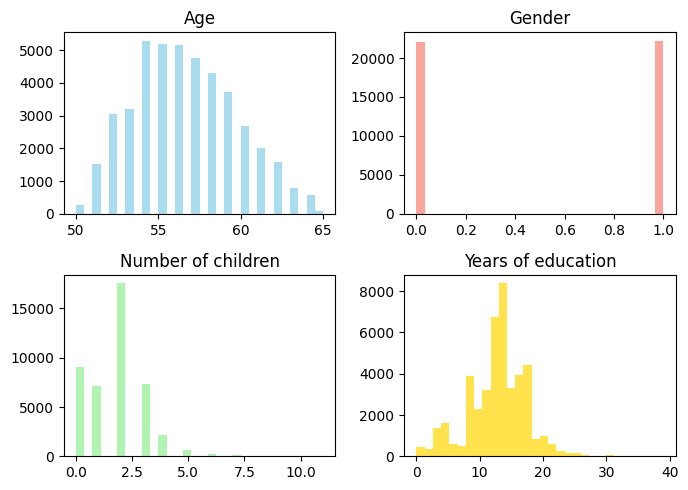

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["age"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Age")

axs[0, 1].hist(df["gender"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Gender")

axs[1, 0].hist(df["nb_children"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Number of children")

axs[1, 1].hist(df["yrseducation"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Years of education")

plt.tight_layout()

plt.show()

In [12]:
round(df["job_status"].value_counts(normalize=True), 2)

job_status
Private sector employee    0.39
Public sector employee     0.21
Employee                   0.20
Self-employed              0.15
Civil servant              0.04
Name: proportion, dtype: float64

In [13]:
round(
    df[
        ["yrscontribution", "retirement_age", "work_horizon", "work_horizon_change"]
    ].describe(),
    2,
)

,yrscontribution,retirement_age,work_horizon,work_horizon_change
count,44246.00,44246.00,44246.00,44246.00
mean,36.01,63.14,6.71,0.26
std,6.03,2.12,3.40,0.60
min,6.00,57.00,0.08,0.00
25%,33.00,62.00,4.00,0.00
50%,37.00,63.75,7.00,0.00
75%,40.00,65.00,9.00,0.08
max,55.00,68.00,17.00,4.00


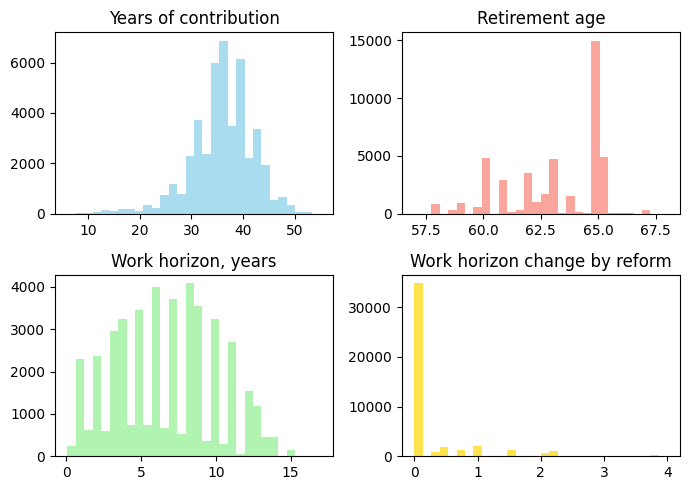

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["yrscontribution"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Years of contribution")

axs[0, 1].hist(df["retirement_age"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Retirement age")

axs[1, 0].hist(df["work_horizon"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Work horizon, years")

axs[1, 1].hist(df["work_horizon_change"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Work horizon change by reform")

plt.tight_layout()

plt.show()

In [15]:
round(df["eurodcat"].value_counts(normalize=True), 2)

eurodcat
0    0.82
1    0.18
Name: proportion, dtype: float64

In [16]:
df["eurod"].value_counts()

eurod
0.0     11935
1.0     10877
2.0      7994
3.0      5399
4.0      3637
5.0      2081
6.0      1187
7.0       656
8.0       255
9.0       160
10.0       49
11.0       12
12.0        4
Name: count, dtype: int64

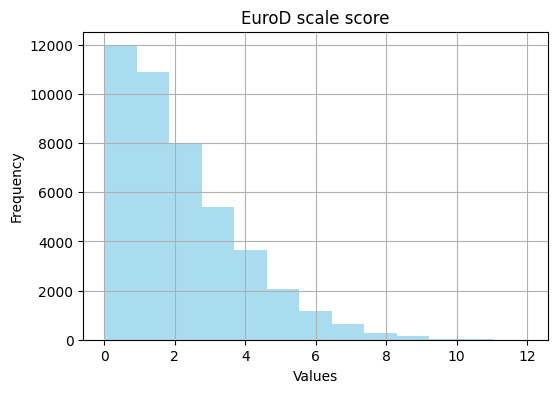

In [17]:
plt.figure(figsize=(6, 4))
plt.hist(df["eurod"], bins=13, color="skyblue", alpha=0.7)
plt.title("EuroD scale score")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [18]:
round(
    df[
        [
            "jqi_monthly_earnings",
            "jqi_skills_discretion",
            "jqi_social_environment",
            "jqi_physical_environment",
            "jqi_intensity",
            "jqi_prospects",
            "jqi_working_time_quality",
        ]
    ].describe(),
    2,
)

,jqi_monthly_earnings,jqi_skills_discretion,jqi_social_environment,jqi_physical_environment,jqi_intensity,jqi_prospects,jqi_working_time_quality
count,44246.00,44246.00,44246.00,44246.00,44246.00,44246.00,44246.00
mean,1594.51,59.78,80.90,84.09,49.89,40.05,86.73
std,493.21,13.57,4.94,9.02,6.57,9.14,9.25
min,318.22,5.41,40.91,42.82,18.60,12.50,36.44
25%,1268.64,49.25,78.56,78.15,45.89,33.97,82.59
50%,1531.58,59.84,81.11,87.00,49.53,39.25,88.91
75%,1834.53,70.81,83.48,91.35,53.49,45.99,93.28
max,6766.63,89.61,100.00,99.36,83.72,87.50,100.00


### Waves 4,5,6 common individuals

In [19]:
df.mergeid.nunique()

6793

In [20]:
unique_mergeid_w4 = set(df[df.wave == 4]["mergeid"].unique())
unique_mergeid_w5 = set(df[df.wave == 5]["mergeid"].unique())
unique_mergeid_w6 = set(df[df.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w5).intersection(
    unique_mergeid_w6
)
len(intersection_ids)

1749

In [21]:
w456_common = df[df["mergeid"].isin(intersection_ids)].reset_index(drop=True)

isco = w456_common["isco"].value_counts().to_frame().reset_index()
isco = isco[isco["count"] >= 10]
w456_common = w456_common[w456_common["isco"].isin(isco["isco"].unique())].reset_index(
    drop=True
)

In [22]:
w456_common.groupby("country").mergeid.nunique()

country
Austria           131
Belgium           243
Czech Republic    133
Denmark           154
Estonia           286
France            164
Germany            27
Italy             113
Slovenia           80
Spain             111
Switzerland       307
Name: mergeid, dtype: int64

In [23]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [24]:
w456_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w456_year_common.csv",
    index=False,
)

### Waves 4 and 6

In [25]:
result = (
    df[df["year"].isin([2013, 2015])]
    .groupby("mergeid")["work_horizon_change"]
    .sum()
    .reset_index()
)
result["year"] = 2015

df = df.drop(columns="work_horizon_change")
df = df.merge(result, on=["mergeid", "year"], how="left")

df["work_horizon_change"] = df["work_horizon_change"].fillna(0)

In [26]:
w46 = df[(df.wave == 4) | (df.wave == 6)].reset_index(drop=True)

In [27]:
w46.mergeid.nunique()

6025

In [28]:
w46.groupby("country").mergeid.nunique()

country
Austria           373
Belgium           753
Czech Republic    465
Denmark           470
Estonia           763
France            433
Germany           665
Italy             560
Slovenia          360
Spain             623
Switzerland       560
Name: mergeid, dtype: int64

In [29]:
w46.groupby("wave").mergeid.nunique()

wave
4    3625
6    4417
Name: mergeid, dtype: int64

In [30]:
w46.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w46_year.csv",
    index=False,
)

### Waves 4 and 6 common individuals

In [31]:
unique_mergeid_w4 = set(w46[w46.wave == 4]["mergeid"].unique())
unique_mergeid_w6 = set(w46[w46.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w6)
len(intersection_ids)

2017

In [32]:
w46_common = w46[w46["mergeid"].isin(intersection_ids)].reset_index(drop=True)

In [33]:
w46_common.groupby("country").mergeid.nunique()

country
Austria           154
Belgium           287
Czech Republic    161
Denmark           165
Estonia           326
France            186
Germany            30
Italy             140
Slovenia           99
Spain             129
Switzerland       340
Name: mergeid, dtype: int64

In [34]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [35]:
w46_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w46_year_common.csv",
    index=False,
)